In [2]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

In [3]:
client = MongoClient('localhost', 27017)

db1 = client.music_cow
col1 = db1.daily_music_cow
col2 = db1.MCPI

In [3]:
list_price = col1.find({}, {'num': {"$slice": [1, 1]}})
list_index = col2.find({}, {'num': {"$slice": [1, 1]}})

data = []
df_price = pd.DataFrame(data, columns=['num'])
df_index = pd.DataFrame(data, columns=['num'])

In [4]:
# make price dataframe
for x in list_price:
    temp_price = x.copy()
    del(temp_price['num'], temp_price['_id'], temp_price['song_title'], temp_price['song_artist'])
    temp_date = {}
    for key, value in temp_price.items():
        temp_date[key] = value['price']
    temp_date['num'] = x['num']
    df_price = df_price.append(temp_date, ignore_index=True)

df_price.to_pickle('df_price.pkl')

In [5]:
# make index dataframe
# 19,20  / 21년도 타입이 다름 -> 계속 오류 발생
for x in list_index:
    temp_index = x.copy()
    del(temp_index['_id'], temp_index['Title'], temp_index['19'], temp_index['20'])
    temp_date = {}
    for YY, month in temp_index.items():
        for n, MM in enumerate(month):
            if MM is None:
                continue
            for DD, value in enumerate(month[MM]):
                if value is None:
                    continue
                temp_date['20{0}-{1}-{2}'.format(YY, MM, DD)] = value
    df_index = df_index.append(temp_date, ignore_index=True)
del(df_index['num'])
df_index.to_pickle('df_index.pkl')

In [4]:
df_price = pd.read_pickle('df_price.pkl')
df_index = pd.read_pickle('df_index.pkl')

베타 값에 대한 정리
https://blothor.tistory.com/39

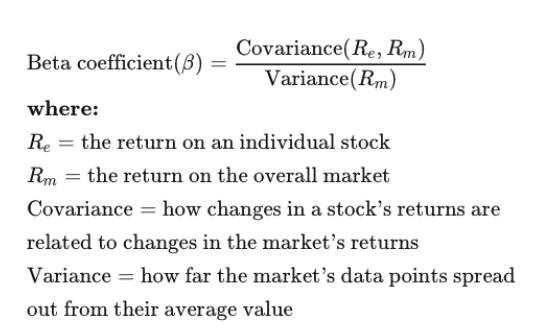

In [5]:
df_price

,num,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,...,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30
0,26,29000,29000,29000,28500,29100,29100,27700,27700,28000,...,37900,36500,37000,36900,36900,36500,36700,36500,34200,34200
1,27,26000,26000,26000,26000,26000,26000,26000,26000,26000,...,40200,40200,40200,40200,47000,47000,40300,40300,40300,40300
2,28,24000,24000,23700,23500,24900,24900,24900,24900,25000,...,30000,33300,30100,30200,33300,33300,33300,33300,30000,30100
3,29,52800,52800,52800,52800,52800,52800,52800,52800,52800,...,105000,122000,122000,122000,122000,122000,103100,103100,103100,103100
4,30,13500,13500,13500,13500,13500,13500,13500,13500,13500,...,32200,30000,30000,38000,38000,30100,30000,30000,30000,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,1550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19000,19000,18900,17500,17500,17700,17700,17700,15800,17900
810,1551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22200,20500,24500,25000,23800,24500,23600,21100,21500,21500
811,1556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41000,52900,49700,49700,49700,42000,49800,45000,45000,53100
812,1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20000,18800,19600,20400,20000,19000,20400,18700,18800,18900


In [18]:
df_index
data = []

In [21]:
# Return on overall market (Rm)

for idx, row in df_index.iterrows():
    date_index, data_index, data_in_tom = row[1:].index, list(row[0:-1]), list(row[1:])
    data_diff = [(int(data_in_tom[i]) - int(data_index[i])) / int(data_index[i]) for i in range(len(data_index))]
    df_rm = pd.DataFrame(data_diff, index=date_index)

df_rm = df_rm.transpose()
df_rm.to_pickle('df_rm.pkl')

In [26]:
# Return on individual stock (Re)

df_rs = pd.DataFrame(data)

for idx, row in df_price.iterrows():
    num, date_price = row[0], row[2:].index
    data_price, data_pr_tom = list(row[1:-1]), list(row[2:])
    data_diff = [(int(data_pr_tom[i]) - int(data_price[i])) / int(data_price[i]) for i in range(len(data_price))]
    df_rs[num] = data_diff
    df_rs.index = date_price
    
    # Covariance Matrix
        # Covariance Matrix a는 MCPI date, b는 list
    # a, b = list(df_index.columns), list(row[2:].index)
    # # result_a, result_b = [elem in a for num_b, elem in enumerate(b)], [elem in b for num_a, elem in enumerate(a)]
    # for date_corr, num_b in enumerate(b):
    #     if date_corr in a:
    #         num_a = a.index(date_corr)
    #         date_price[]

    
    
    if num == 1427:
        break

df_rs = df_rs.transpose()
df_rs.to_pickle('df_rs.pkl')

C:\Users\LG\AppData\Local\Temp/ipykernel_20660/3002187673.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_rs[num] = data_diff


In [23]:
df_rm = pd.read_pickle('df_rm.pkl')
df_rm

,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,...,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24
0,0.007519,0.0,0.0,-0.007463,0.0,0.0,0.0,0.0,0.0,-0.007519,...,0.0,0.006079,0.006042,0.012012,-0.002967,0.002976,-0.005935,0.0,-0.008955,0.003012


In [25]:
# Correlation Matrix

# beta = cor(개별 주식, 시장) * 개별 주식 표편 / 시장 표편

data = []
df_corr = pd.DataFrame(data)

for idx, row in df_rs.iterrows():
    df_row = pd.DataFrame(row).transpose()
    df_temp = pd.concat([df_row, df_rm], axis=0, join='inner').transpose()
    corr = df_temp.corr(method='pearson').iloc[0, 1]
    df_corr[idx] = [corr]

    if idx == 1427:
        break

df_corr.to_pickle('df_corr.pkl')

,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,...,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30
26,0.000000,0.000000,-0.017241,0.021053,0.000000,-0.048110,0.000000,0.010830,0.000000,0.003571,...,0.000000,-0.036939,0.013699,-0.002703,0.000000,-0.010840,0.005479,-0.005450,-0.063014,0.000000
27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.115385,...,-0.151899,0.000000,0.000000,0.000000,0.169154,0.000000,-0.142553,0.000000,0.000000,0.000000
28,0.000000,-0.012500,-0.008439,0.059574,0.000000,0.000000,0.000000,0.004016,0.000000,-0.076000,...,-0.029126,0.110000,-0.096096,0.003322,0.102649,0.000000,0.000000,0.000000,-0.099099,0.003333
29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000951,0.161905,0.000000,0.000000,0.000000,0.000000,-0.154918,0.000000,0.000000,0.000000
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045455,-0.068323,0.000000,0.266667,0.000000,-0.207895,-0.003322,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.000000,0.025547,-0.007117,0.000000,0.000000,0.021505,-0.035088,0.025455,0.000000,-0.010638,...,-0.033019,0.000000,0.034146,-0.035377,0.026895,-0.023810,0.000000,0.000000,-0.002439,0.009780
1383,-0.008746,0.002941,-0.005865,-0.011799,0.000000,0.014925,-0.032353,0.000000,-0.024316,0.034268,...,-0.002232,-0.046980,-0.044601,0.081081,-0.065909,-0.004866,0.026895,-0.026190,0.000000,0.044010
1386,-0.022814,-0.007782,0.023529,-0.061303,0.036735,-0.003937,0.027668,0.000000,-0.003846,-0.030888,...,0.018349,-0.009009,-0.003030,0.030395,-0.026549,0.018182,-0.014881,-0.009063,0.036585,-0.041176
1387,0.000000,-0.004082,-0.004098,0.008230,0.000000,0.032653,-0.023715,0.004049,0.028226,-0.043137,...,-0.041916,0.000000,0.065625,0.000000,0.000000,-0.061584,-0.059375,0.029900,0.000000,-0.009677


In [28]:
df_corr = pd.read_pickle('df_corr.pkl')
df_corr

,0
26,0.034775
27,0.079149
28,0.071884
29,0.044273
30,0.141445
...,...
1382,0.124234
1383,0.241757
1386,0.051175
1387,-0.249228


In [29]:
# 표준편차 구하기

data = []
df_std_rs = pd.DataFrame(data)

std_rm = df_rm.transpose().std()

for idx, row in df_rs.iterrows():
    df_row = pd.DataFrame(row)
    std_rs = df_row.std().iloc[0]
    df_std_rs[idx] = [std_rs]

    if idx == 1427:
        break

print('마켓 표준편차: ', std_rm[0])

df_std_rs.to_pickle('df_std_rs.pkl')

C:\Users\LG\AppData\Local\Temp/ipykernel_20660/1570234870.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_std_rs[idx] = [std_rs]


마켓 표준편차:  0.03397568309262336


In [30]:
# 각 종목 별 베타 계수

df_std_rs = pd.read_pickle('df_std_rs.pkl')
df_corr = pd.read_pickle('df_corr.pkl').transpose()


df_beta = pd.DataFrame(data)
df_mul = df_corr.mul(df_std_rs)
df_beta = df_mul.div(std_rm[0])


df_beta.to_pickle('df_beta.pkl')

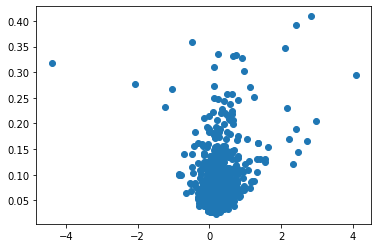

In [31]:
# Beta plot

import matplotlib.pyplot as plt

df_beta = pd.read_pickle('df_beta.pkl')
df_std_rs = pd.read_pickle('df_std_rs.pkl')

df_temp = pd.concat([df_beta, df_std_rs])
df_temp.index = ['beta', 'std']
df_temp = df_temp.transpose()
plt.scatter(df_temp['beta'], df_temp['std'])
plt.show()
